In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt


In [2]:
# exportfigurepath="/Users/ryanmaloney/Dropbox/deBivort/Drift/RawFigures/"

# exportfigurepath="/Volumes/GoogleDrive/My Drive/Drift/RawFigures/"
exportfigurepath="/Users/ryanmaloney/Documents/deBivort/Drift/RawFigures/"

In [3]:
d=pd.read_csv('DGRPlongdata.csv')
sns.set_theme(style="darkgrid")

d['keyAge']=d['uniquetrayID']+d['FlyID']/100+d['Age']/10000
d['key']=d['uniquetrayID']+d['FlyID']/100
d.Age=d.Age.astype('float64')
d.Strain=d.Strain.astype('str')

In [4]:
# print(len(np.unique(d['keyAge'])))
# print(len(d['keyAge']))
x,b=np.unique(d['keyAge'], return_counts=True)
# print(np.where(b>1))
# doubledindexes=np.where(b>1)[0]
# print(doubledindexes)
# print(d['keyAge'][doubledindexes])

/Users/ryanmaloney/miniforge3/envs/cmdstan/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_85218/720608122.py:7: RuntimeWarning: Mean of empty slice
  pivd['Mean']=np.nanmean(pivd.iloc[:, 0:6], axis=1)


<Axes: xlabel='SD', ylabel='Mean'>

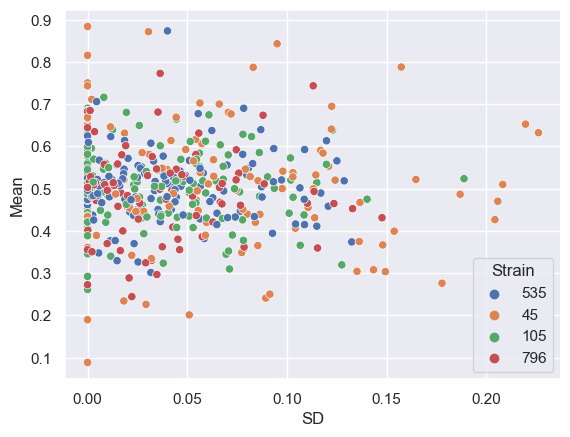

In [5]:
cleaneddata=d[d['Ntrials']>50]
pivd=pd.pivot(data=cleaneddata, index=['key', 'Strain'],
              columns='Age',values='rBias')
# print(pivd.iloc[0])

pivd['SD']=np.nanstd(pivd.iloc[:, 0:6], axis=1)
pivd['Mean']=np.nanmean(pivd.iloc[:, 0:6], axis=1)
pivdt=pivd

sns.scatterplot(data=pivdt, x='SD', y='Mean', hue='Strain')

In [6]:
pivdshifted=pivd
pivdshifted=pivdshifted.reset_index()
# print(pivdshifted.iloc[1, 2:8])
for i in range(pivdshifted.shape[0]):
    if np.isnan(pivdshifted.iloc[i,4]):# & ~np.isfinite(pivdshifted.iloc[i,3]):
        pivdshifted.iloc[i,4]= pivdshifted.iloc[i,3]
        pivdshifted.iloc[i,3]= pivdshifted.iloc[i,2]


#         print(i)
        
    if np.isfinite(pivdshifted.iloc[i,8]) & np.isnan(pivdshifted.iloc[i,7]):
        pivdshifted.iloc[i,7]= pivdshifted.iloc[i,8]

pivdshifted=pivdshifted.iloc[:,[0,1,3, 4,5,6,7]]
pivdshifted['SD']=np.nanstd(pivdshifted.iloc[:, 2:7], axis=1)
pivdshifted['Mean']=np.nanmean(pivdshifted.iloc[:, 2:7], axis=1)
# pivdshifted=pivdshifted.reset_index()
# pivdshifted=pivdshifted.iloc[:,[3, 4, ]
t=np.count_nonzero(np.isnan(pivdshifted.iloc[:,2:7]), axis=1)
# print(t)
pivdshifted['T']=t
pdst=pivdshifted[t<4]
# pdst
# pivdshifted=pivdshifted.reset_index()
# print(t)
# pdst=pivdshifted[t>1]
# pdst=pdst[np.isfinite(pdst[1.0])]
# pdst=pdst.iloc[:, 0,1,3
# pdst=pivdshifted
# pdst.iloc[np.where(pdst['SD']==0)]
# pdst.reset_index
pdst.reset_index(inplace=True)
pivdt2=pivdt.reset_index()
cdm=cleaneddata.melt(id_vars=['Age', 'key',  'Strain'], value_vars=['rBias'])
pdst_strictall=pdst[np.isreal(pdst.iloc[:,2:7]).all(axis=1)]
cleaneddata2=pdst_strictall.iloc[:,:7].melt(id_vars=["key", "Strain"])

In [7]:
nona=pdst_strictall.iloc[:, 0:5].dropna(axis=0)

dgrp_data={"J": 252,
           "x": np.array(nona.iloc[:,3]),
          "y": np.array(nona.iloc[:,4])}

stan_file="dgrpdrift2.stan"
model = CmdStanModel(stan_file=stan_file)

In [8]:
fit = model.sample(data=dgrp_data)
print(fit.summary())

13:35:30 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:35:30 - cmdstanpy - INFO - CmdStan done processing.
13:35:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8qrm0kio/tmppksmwwge.stan', line 12, column 2 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8qrm0kio/tmppksmwwge.stan', line 12, column 2 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8qrm0kio/tmppksmwwge.stan', line 12, column 2 to column 31)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8qrm0kio/tmppksmwwge.stan', line 12, column 2 to column 31)
Consider re-running with show_console=True if the above output is unclear!



             Mean      MCSE    StdDev          5%         50%         95%  \
lp__   384.673000  0.025406  1.035560  382.623000  384.985000  385.630000   
alpha    0.975227  0.000272  0.016445    0.948571    0.975126    1.002470   
sigma    0.131111  0.000106  0.005891    0.121837    0.130832    0.141188   

         N_Eff  N_Eff/s     R_hat  
lp__   1661.44  16614.4  1.001530  
alpha  3645.61  36456.1  0.999847  
sigma  3089.24  30892.4  1.000330  


In [9]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma
0,385.383,1.000000,0.862428,2.0,3.0,0.0,-382.761,0.963724,0.132282
1,385.669,0.921204,0.862428,2.0,3.0,0.0,-384.623,0.974568,0.129416
2,385.585,0.970538,0.862428,1.0,3.0,0.0,-385.421,0.974458,0.133113
3,385.030,0.945790,0.862428,2.0,3.0,0.0,-384.942,0.957240,0.129544
4,385.280,0.818889,0.862428,2.0,7.0,0.0,-383.307,0.986934,0.133913
...,...,...,...,...,...,...,...,...,...
3995,385.635,0.916109,0.915440,2.0,3.0,0.0,-384.342,0.971048,0.129516
3996,383.709,0.663425,0.915440,2.0,3.0,0.0,-383.165,0.943333,0.132658
3997,385.504,0.997152,0.915440,2.0,3.0,0.0,-383.891,0.980676,0.127577
3998,385.244,0.880291,0.915440,2.0,7.0,0.0,-384.633,0.960261,0.131096


In [10]:
c2=cleaneddata[["Strain", "Age", "Ntrials", "rBias", "key"]].pivot(index=["key", "Strain"], columns="Age")

ntrials1=c2["Ntrials"][1.0]
ntrials2=c2["Ntrials"][2.0]
validtrials_t1=np.where(~c2['Ntrials'][1.0].isna())[0]
validtrials_t2=np.where(~c2['Ntrials'][2.0].isna())[0]
mistrials_t1=np.where(c2['Ntrials'][1.0].isna())[0]
mistrials_t2=np.where(c2['Ntrials'][2.0].isna())[0]
rBias1=c2["rBias"][1.0]
rBias2=c2["rBias"][2.0]
strain=c2.index.to_frame().iloc[:,1]
sc=pd.Categorical(strain.astype("category"))

N=strain.shape[0]

N

# x1=np.array(np.array(np.where(~rBias1.isna())*np.array(np.where(~ntrials1.isna()))), dtype=int)[0]
# x2=np.array(np.array(np.where(~rBias2.isna())*np.array(np.where(~ntrials2.isna()))), dtype=int)[0]
x1=np.array((ntrials1.to_numpy()[np.array(np.where(~ntrials1.isna()), dtype=int)]-1)*rBias1.to_numpy()[np.array(np.where(~rBias1.isna()), dtype=int)], dtype=int)[0]
x2=np.array((ntrials2.to_numpy()[np.array(np.where(~ntrials2.isna()), dtype=int)]-1)*rBias2.to_numpy()[np.array(np.where(~rBias2.isna()), dtype=int)], dtype=int)[0]
n1=np.array(ntrials1.iloc[validtrials_t1], dtype=int)-1
n2=np.array(ntrials2.iloc[validtrials_t2], dtype=int)-1
print("day 1 shapes")
print(x1.shape)
print(n1.shape)
print(validtrials_t1.shape[0])

print("day 2 shapes")
print(x2.shape)
print(n2.shape)
print(validtrials_t2.shape[0])
N
# validtrials_t2.shape[0]
# ntrials2.shape

day 1 shapes
(259,)
(259,)
259
day 2 shapes
(268,)
(268,)
268


468

In [11]:
# rBias1.to_numpy()[np.array(np.where(~rBias1.isna()), dtype=int)]
(ntrials1.to_numpy()[np.array(np.where(~ntrials1.isna()), dtype=int)]-1)*rBias1.to_numpy()[np.array(np.where(~rBias1.isna()), dtype=int)]


array([[ 38.,  92., 255., 135., 101., 252., 434., 169.,  88.,  89.,  52.,
        117., 105., 394., 264., 470., 240., 286., 286., 466., 363., 276.,
        332., 167., 207.,  98., 226., 356., 311., 290., 274., 153., 268.,
        708., 227., 522., 548., 613., 271., 598., 429., 346., 453., 220.,
        384., 276., 461., 779., 329., 417., 243., 236., 110., 392., 402.,
        199., 204., 303., 447., 243., 369., 254., 220., 166., 723., 468.,
        490., 202., 332., 289., 237., 213., 153., 323., 159., 216., 317.,
        142., 189., 210., 254., 161., 191., 179., 223., 219., 251., 259.,
        208., 125., 298., 266., 457., 138., 507., 302., 450., 660., 385.,
         75., 294., 359., 378., 218., 183., 185., 402., 251., 264., 627.,
        457., 494.,  27., 186., 172., 381., 333., 363., 232., 337.,  72.,
        751., 529., 785., 137., 393., 662.,  95., 638.,  53., 485.,  96.,
        483., 863., 557., 530., 739., 372., 164., 292., 140., 161.,  63.,
         76., 119., 168., 123.,  17., 

In [12]:
# np.array(np.array(np.where(~rBias1.isna())*np.array(np.where(~ntrials1.isna()))), dtype=int)[0]
# type(x1[0])

In [13]:
dgrp_data7={"N": N,
            "S": 4,
            "s": sc.codes+1,
            "t1_obs": validtrials_t1.shape[0],
            "t2_obs": validtrials_t2.shape[0],
            "t1_mis": mistrials_t1.shape[0],
            "t2_mis": mistrials_t2.shape[0],
            "t1i_obs": validtrials_t1+1,
            "t2i_obs": validtrials_t2+1,
            "t1i_mis": mistrials_t1+1,
            "t2i_mis": mistrials_t2+1,
           "x1_obs": x1,
           "x2_obs": x2,
           "n1_obs": n1,
           "n2_obs": n2}

In [14]:
stan_file="dgrp_model3.stan"
# stan_file="dgrp_model_test.stan"
model = CmdStanModel(stan_file=stan_file)


In [15]:
dgrp_data_test={
            # "N": N,
            # "S": 4,
            # "s": sc.codes+1,
            "t1_obs": int(validtrials_t1.shape[0]),
            # "t2_obs": validtrials_t2.shape[0],
            # "t1_mis": mistrials_t1.shape[0],
            # "t2_mis": mistrials_t2.shape[0],
            # "t1i_obs": validtrials_t1+1,
            # "t2i_obs": validtrials_t2+1,
            # "t1i_mis": mistrials_t1+1,
            # "t2i_mis": mistrials_t2+1,
           "x1_obs": x1,
          #  "x2_obs": x2,
           "n1_obs": n1}
          #  "n2_obs": n2}

(259,)
(259,)
259


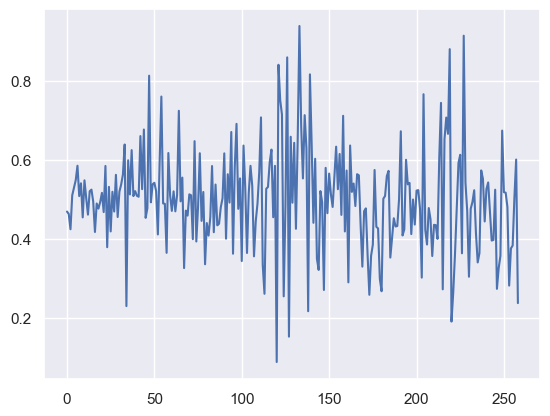

In [16]:
print(x1.shape)
print(n1.shape)
print(validtrials_t1.shape[0])
plt.plot(x1/n1)

In [17]:
fit = model.sample(data=dgrp_data7, 
# show_console=True,
 iter_sampling=1000)

13:35:32 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:35:53 - cmdstanpy - INFO - CmdStan done processing.
13:35:53 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpc1q49c4e/tmp7m9la_24.stan', line 64, column 8 to column 36)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpc1q49c4e/tmp7m9la_24.stan', line 64, column 8 to column 36)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpc1q49c4e/tmp7m9la_24.stan', line 64, column 8 to column 36)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpc1q49c4e/tmp7m9la_24.stan', line 64, column 8 to column 36)
Consider re-running with show_console=True if the above output is unclear!


In [18]:
fit.diagnose()

'Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.\n'

In [19]:
# fit.draws()

In [20]:
stan_summary=fit.summary()

In [21]:
print(stan_summary['Mean'])

lp__        -157544.000000
R1_obs[1]         0.499636
R1_obs[2]         0.466004
R1_obs[3]         0.426566
R1_obs[4]         0.516443
                 ...      
R2[464]           0.505477
R2[465]           0.504394
R2[466]           0.598978
R2[467]           0.562506
R2[468]           0.443238
Name: Mean, Length: 1877, dtype: float64


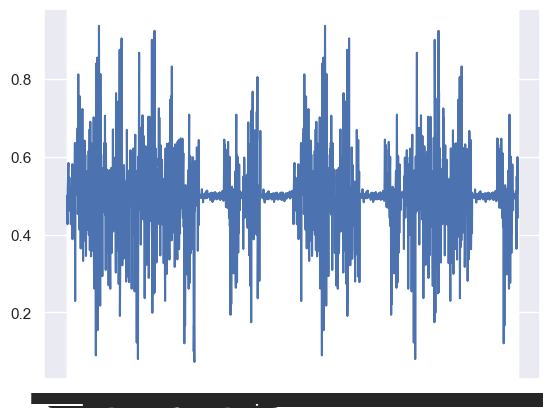

In [22]:
plt.plot(stan_summary["Mean"][1:])

In [23]:
stan_summary.iloc[528:533]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
D[1],0.099199,0.000247,0.010019,0.083954,0.098621,0.116237,1647.880,50.0981,1.001140
D[2],0.167516,0.000376,0.015969,0.143546,0.166275,0.195664,1802.300,54.7928,1.000880
D[3],0.082484,0.000235,0.008947,0.068973,0.082190,0.097896,1452.320,44.1528,1.003340
D[4],0.072400,0.000664,0.013773,0.051303,0.071535,0.095718,429.881,13.0691,1.001900
R1_mis[1],0.470323,0.001215,0.090042,0.323246,0.469952,0.619983,5495.760,167.0800,0.999655


In [24]:
# sns.histplot(np.squeeze(fit.draws()[:,528:532,:]))

In [25]:
fit.draws()[:,:,:].shape

(1000, 4, 1883)

In [26]:
fit.draws().shape

(1000, 4, 1883)

<Axes: ylabel='Count'>

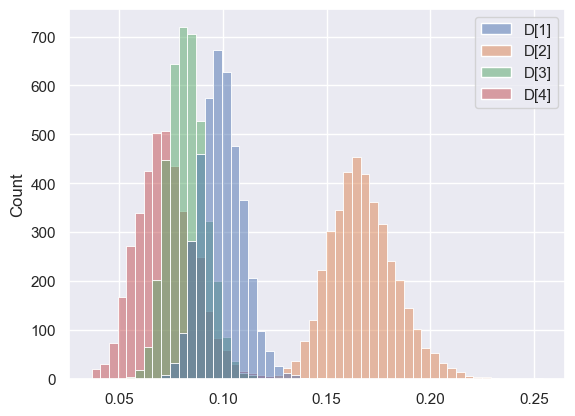

In [27]:
sns.histplot(fit.draws_pd()[['D[1]', 'D[2]', 'D[3]', 'D[4]']])

## Sam-Keny's Data 

In [28]:
b1t1=pd.read_csv('b1t1.csv')
b1t2=pd.read_csv('b1t2.csv')
b2t1=pd.read_csv('b2t1.csv')
b2t2=pd.read_csv('b2t2.csv')
b2t3=pd.read_csv('b2t3.csv')
# print(b1t1.columns, b1t2.columns, b2t1.columns, b2t2.columns, b2t3.columns)
# print(b1t1.shape, b1t2.shape, b2t1.shape, b2t2.shape, b2t3.shape)
# b2t1
# b2t3.iloc[:,0:21].columns=b1t1.columns
# b2t3_trunc=b2t3.iloc[:,0:21]
# b2t3_trunc.columns=b1t1.columns
# b2t3_trunc
# b2t1.columns=b1t2.columns
# b2t1
dgrpall_old=pd.concat([b1t1, b1t2, b2t1, b2t2, b2t3], join="outer")
dgrpall_old.shape

(480, 23)

In [29]:
dgrpall=pd.read_csv('DGRPsummerall.csv')
dgrpall

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,n_Week1Day3,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,1,1,1,45,1,54,0.509434,610.0,0.316913,34.0,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,2,45,1,873,0.321101,217.0,0.601852,3.0,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,1,1,3,45,1,196,0.635897,686.0,0.400000,15.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,1,1,4,45,1,3,0.500000,257.0,0.378906,46.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,1,1,5,45,1,0,NaN,726.0,0.388966,1.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,5,2,92,819,0,343,0.654971,158.0,0.477707,NaN,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1244,5,2,93,819,0,281,0.435714,31.0,0.566667,NaN,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,5,2,94,819,0,126,0.328000,395.0,0.428934,NaN,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1246,5,2,95,819,0,472,0.585987,363.0,0.651934,NaN,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# np.unique(dgrpall['LineNumber'])

In [31]:
skt=dgrpall[dgrpall['LineNumber']!=0]
skt.shape

(1193, 23)

In [32]:
sc=pd.Categorical(skt["LineNumber"])
validtrials_t1=np.where(~skt['rBias_Week1Day1'].isna())[0]
validtrials_t2=np.where(~skt['rBias_Week1Day2'].isna())[0]
mistrials_t1=np.where(skt['rBias_Week1Day1'].isna())[0]
mistrials_t2=np.where(skt['rBias_Week1Day2'].isna())[0]

print(validtrials_t1.shape, validtrials_t2.shape, mistrials_t1.shape, mistrials_t2.shape)
# skt[]
# np.where(skt['rBias_Week1Day2'].isna())[0]
# np.where(~skt['rBias_Week1Day1'].isna())[0]
ntrials1=skt['n_Week1Day1']
ntrials2=skt['n_Week1Day2']

rBias1=skt['rBias_Week1Day1']
rBias2=skt['rBias_Week1Day2']
print(ntrials1.shape, ntrials2.shape, rBias1.shape, rBias2.shape)
# del x1, x2
x1=np.array((ntrials1.to_numpy()[np.array(np.where(~rBias1.isna()), dtype=int)]-1)*rBias1.to_numpy()[np.array(np.where(~rBias1.isna()), dtype=int)], dtype=int)[0]
x2=np.array((ntrials2.to_numpy()[np.array(np.where(~rBias2.isna()), dtype=int)]-1)*rBias2.to_numpy()[np.array(np.where(~rBias2.isna()), dtype=int)], dtype=int)[0]
validtrials_t1
n1=np.array(ntrials1.iloc[validtrials_t1], dtype=int)-1
n2=np.array(ntrials2.iloc[validtrials_t2], dtype=int)-1

(1149,) (913,) (44,) (280,)
(1193,) (1193,) (1193,) (1193,)


In [33]:
ntrials1

0        54
1       873
2       196
3         3
4         0
       ... 
1243    343
1244    281
1245    126
1246    472
1247     39
Name: n_Week1Day1, Length: 1193, dtype: int64

In [34]:
dgrp_data_sk_2d={"N": skt.shape[0],
              "S": np.unique(skt['LineNumber']),
              "s": sc.codes+1,
              "t1_obs": validtrials_t1.shape[0],
              "t2_obs": validtrials_t2.shape[0],
              "t1_mis": mistrials_t1.shape[0],
              "t2_mis": mistrials_t2.shape[0],
              "t1i_obs": validtrials_t1+1,
              "t2i_obs": validtrials_t2+1,
              "t1i_mis": mistrials_t1+1,
              "t2i_mis": mistrials_t2+1,
              "x1_obs": x1,
              "x2_obs": x2,
              "n1_obs": n1,
              "n2_obs": n2}

In [35]:
# ntrials1=c2["Ntrials"][1.0]
# ntrials2=c2["Ntrials"][2.0]
# validtrials_t1=np.where(~c2['Ntrials'][1.0].isna())[0]
# validtrials_t2=np.where(~c2['Ntrials'][2.0].isna())[0]
# mistrials_t1=np.where(c2['Ntrials'][1.0].isna())[0]
# mistrials_t2=np.where(c2['Ntrials'][2.0].isna())[0]
# rBias1=c2["rBias"][1.0]
# rBias2=c2["rBias"][2.0]
# strain=c2.index.to_frame().iloc[:,1]

# Path forward
The issue right now is that there's no straightforward way to ragged arrays or matrix indexing in STAN. So there are two main paths forward:
1. Hardcode every day as a separate vector
2. Condense everything to a 1-d vector and smartly index into that see [Ragged Data Structures](https://mc-stan.org/docs/stan-users-guide/ragged-data-structs.html#ragged-data-structs.section) for example

Doing due dillegence thinking about path 2, there are basically 3 pre-Stan calculations I need:
## Seperate arrrays for each data point saying
  * What fly it is
  * What day it is
  * rBias that day
  * n that day

##  To do list
1. make a 1d vector with all actual observations in it
2. make a corresponding index vector that tells fly vs day

In [36]:
skt=dgrpall[dgrpall['LineNumber']!=0]
skt=skt.reset_index(drop=True).reset_index()
skt=skt.rename(columns={'index':"uID"})
skt

,uID,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,0,1,1,1,45,1,54,0.509434,610.0,0.316913,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,1,2,45,1,873,0.321101,217.0,0.601852,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,2,1,1,3,45,1,196,0.635897,686.0,0.400000,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,3,1,1,4,45,1,3,0.500000,257.0,0.378906,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,4,1,1,5,45,1,0,NaN,726.0,0.388966,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1188,5,2,92,819,0,343,0.654971,158.0,0.477707,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1189,1189,5,2,93,819,0,281,0.435714,31.0,0.566667,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,1190,5,2,94,819,0,126,0.328000,395.0,0.428934,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1191,1191,5,2,95,819,0,472,0.585987,363.0,0.651934,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
skt_melted=skt.iloc[:,0:23].melt(id_vars=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID"])
skt_melted['Day']=pd.Series(np.zeros(skt_melted.shape[0]))
skt_melted['Variable']=pd.Series(np.zeros(skt_melted.shape[0]))
dayreg=re.compile('Day([0-9]+)')
weekreg=re.compile('Week([0-9]+)')
# varreg=
for row in np.arange(skt_melted.shape[0]):
  # print(row)
  day=dayreg.search(skt_melted.iloc[row]['variable']).group(1)
  week=weekreg.search(skt_melted.iloc[row]['variable']).group(1)
  skt_melted.iloc[row, 8]=int(int(day)+(int(week)-1)*7)-1
  skt_melted.iloc[row,9]=str(skt_melted.iloc[row,6])[0]
  # print(day.group(1))
skt_melted=skt_melted.drop(columns=['variable'])
skt_unmelted=skt_melted.pivot(index=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID", "Day"], columns="Variable", values="value")
skt_unmelted['x']=(skt_unmelted['n']-1)*skt_unmelted['r']
skt_unmelted=skt_unmelted.reset_index()
skt_unmelted_obs=skt_unmelted.dropna(axis="index")
skt_unmelted_obs

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
...,...,...,...,...,...,...,...,...,...,...
10728,5,2,96,819,0,1192,0.0,39.0,0.552632,21.0
10729,5,2,96,819,0,1192,1.0,133.0,0.560606,74.0
10731,5,2,96,819,0,1192,7.0,438.0,0.519451,227.0
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0


In [38]:
skt.iloc[:,0:23].melt(id_vars=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID"])


,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,variable,value
0,1,1,1,45,1,0,n_Week1Day1,54.0
1,1,1,2,45,1,1,n_Week1Day1,873.0
2,1,1,3,45,1,2,n_Week1Day1,196.0
3,1,1,4,45,1,3,n_Week1Day1,3.0
4,1,1,5,45,1,4,n_Week1Day1,0.0
...,...,...,...,...,...,...,...,...
20276,5,2,92,819,0,1188,n_Week3Day3,NaN
20277,5,2,93,819,0,1189,n_Week3Day3,NaN
20278,5,2,94,819,0,1190,n_Week3Day3,NaN
20279,5,2,95,819,0,1191,n_Week3Day3,NaN


In [39]:
skt_unmelted_mis=skt_unmelted[skt_unmelted.isna().any(axis=1)]
skt_unmelted_mis

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
7,1,1,1,45,1,0,15.0,NaN,NaN,NaN
8,1,1,1,45,1,0,16.0,-1.0,NaN,NaN
15,1,1,2,45,1,1,14.0,-1.0,NaN,NaN
16,1,1,2,45,1,1,15.0,NaN,NaN,NaN
17,1,1,2,45,1,1,16.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10727,5,2,95,819,0,1191,16.0,NaN,NaN,NaN
10730,5,2,96,819,0,1192,2.0,NaN,NaN,NaN
10734,5,2,96,819,0,1192,14.0,NaN,NaN,NaN
10735,5,2,96,819,0,1192,15.0,NaN,NaN,NaN


In [40]:
dummyrow=skt_unmelted_mis.iloc[0,:]
dummyrow

Variable
BatchNumber     1.0
TrayNumber      1.0
FlyID           1.0
LineNumber     45.0
Sex             1.0
uID             0.0
Day            15.0
n               NaN
r               NaN
x               NaN
Name: 7, dtype: float64

In [41]:
dummyrow.loc['Day']

15.0

In [42]:
skt_unmelted_mis_b=skt_unmelted_mis
dummyrow=skt_unmelted_mis.iloc[0,:]
dummyrow
actualdays=np.unique(skt_unmelted_obs["Day"])
fullrange=np.arange(0,np.max(actualdays))
for ii, i in enumerate(actualdays):
  for jj, j in enumerate(fullrange):
    if j==i:
      # print(j)
      # print(i)
      fullrange[jj]=np.nan


missingdays=np.array(pd.Series(fullrange).dropna(), dtype=int)

np.unique(skt_unmelted_obs["Day"])
for i in range(skt.shape[0]):
  dummyrownew=dummyrow.copy()
  dummyrownew.loc['uID']=int(i)
  for j in missingdays:
    dummyrownew.loc['Day']=int(j)
    skt_unmelted_mis_b=pd.concat([skt_unmelted_mis_b, pd.DataFrame(dummyrownew).T])
    # skt_unmelted_mis_b.append(dummyrow)

In [43]:
skt_unmelted

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
...,...,...,...,...,...,...,...,...,...,...
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0
10733,5,2,96,819,0,1192,9.0,231.0,0.500000,115.0
10734,5,2,96,819,0,1192,14.0,NaN,NaN,NaN
10735,5,2,96,819,0,1192,15.0,NaN,NaN,NaN


In [44]:
skt.shape[0]

1193

In [45]:
skt

,uID,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,0,1,1,1,45,1,54,0.509434,610.0,0.316913,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,1,2,45,1,873,0.321101,217.0,0.601852,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,2,1,1,3,45,1,196,0.635897,686.0,0.400000,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,3,1,1,4,45,1,3,0.500000,257.0,0.378906,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,4,1,1,5,45,1,0,NaN,726.0,0.388966,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1188,5,2,92,819,0,343,0.654971,158.0,0.477707,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1189,1189,5,2,93,819,0,281,0.435714,31.0,0.566667,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,1190,5,2,94,819,0,126,0.328000,395.0,0.428934,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1191,1191,5,2,95,819,0,472,0.585987,363.0,0.651934,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
dgrp_data_sk_alld={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+1), #Total number of Days
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}

In [47]:
np.min(np.array(skt_unmelted['n'], dtype=int)-np.array(skt_unmelted['x'], dtype=int))

-1

In [48]:
for x in dgrp_data_sk_2d:
  print(x, "Max: ", np.max(dgrp_data_sk_2d[x]), "Min: ", np.min(dgrp_data_sk_2d[x]))

N Max:  1193 Min:  1193
S Max:  907 Min:  45
s Max:  10 Min:  1
t1_obs Max:  1149 Min:  1149
t2_obs Max:  913 Min:  913
t1_mis Max:  44 Min:  44
t2_mis Max:  280 Min:  280
t1i_obs Max:  1193 Min:  1
t2i_obs Max:  1193 Min:  1
t1i_mis Max:  1125 Min:  5
t2i_mis Max:  1184 Min:  37
x1_obs Max:  1162 Min:  0
x2_obs Max:  1021 Min:  0
n1_obs Max:  1988 Min:  1
n2_obs Max:  1723 Min:  1


In [49]:
# os.remove('dgrp_model4')

stan_file="dgrp_model4.stan"
# stan_file="dgrp_model_test.stan"
model = CmdStanModel(stan_file=stan_file)


In [50]:
fitnew = model.sample(data=dgrp_data_sk_2d,
#  show_console=True,
  iter_sampling=1000)

13:36:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:36:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:36:20 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
13:36:20 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
13:36:20 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted


13:36:20 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8vsdtfvr/tmppa3rtrb9.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8vsdtfvr/tmppa3rtrb9.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8vsdtfvr/tmppa3rtrb9.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp8vsdtfvr/tmppa3rtrb9.stan', line 3, column 2 to column 17)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model4', 'id=1', 'random', 'seed=23165', 'data', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/_3zsdp7w.json', 'output', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model4x02yzq8c/dgrp_model4-20230403133620_1.csv', 'method=sample', 'num_samples=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model4x02yzq8c/dgrp_model4-20230403133620_1.csv
 console_msgs (if any):
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model4x02yzq8c/dgrp_model4-20230403133620_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [ ]:
fit_old=fit
fit=fitnew

In [ ]:
fsn=fitnew.summary()

In [ ]:
fsn

In [ ]:
fsn.index

In [ ]:
fsn[(fsn.index=="D[1]")]

# Take home message and next steps
The Ds have a very wide posterior
1. This could be real
2. This could be a result of long durations not being a good match to the diffusion model
3. This could be the drift parameter not being implemented properly?
4. Current Theory: R_mis is the problem and is setting too strong a prior on missing data, esp. for the gaps. 

In [ ]:
fit.diagnose()

In [ ]:
fd=fit.draws_pd()

In [ ]:
sns.histplot(fd["D[1]"])

In [ ]:
Drift_parameters=fd.loc[:,"D[1]":"D[7]"]
Drift_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(Drift_parameters)

In [ ]:
dpm=Drift_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})

In [ ]:
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian")
plt.savefig('Drift_SK_DGRP.pdf')

In [ ]:
BH_parameters=fd.loc[:,"BH[1]":"BH[7]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)

In [ ]:
bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":"SD of initial preference"})

In [ ]:
sns.violinplot(data=bhpm, x="DGRP Line", y="SD of initial preference")
plt.savefig('BH_SK_DGRP.pdf')

In [ ]:
dpm

In [ ]:
bhpm["SD of initial preference"]

In [ ]:
bhd=pd.concat([dpm, bhpm["SD of initial preference"]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)

In [ ]:


sz=np.ones(bhd_r.shape[0])*.2
bhd_r["Size"]=sz

In [ ]:
bhd_r["Size"]

In [ ]:
sp=sns.scatterplot(data=bhd_r, x="SD of initial preference", y="SD of Drift Gaussian", hue="DGRP Line",
# sizes=sz,
alpha=.5)
sp
plt.savefig('sp_SK_DGRP.pdf')

In [ ]:
kdp=sns.kdeplot(
    data=bhd, x="SD of initial preference", y="SD of Drift Gaussian", hue="DGRP Line", fill=True,
    alpha=.5
)
kdp
plt.savefig('kde_SK_DGRP.pdf')

In [ ]:
pp=sns.pairplot(
    data=bhd, 
    # x="SD of initial preference", y="SD of Drift Gaussian", 
    hue="DGRP Line",
)
pp

In [ ]:
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian")

sns.kdeplot(
    data=bhd, x="SD of Drift Gaussian", y="SD of Drift Gaussian", hue="DGRP Line", fill=True,
)

In [ ]:
Drift_parameters

In [ ]:
skt_unmelted

In [ ]:



# sns.lineplot(data=skt.iloc[:15,7:25:2].T, hue=skt['LineNumber'].iloc[0:15])

In [ ]:
skto=skt_unmelted_obs.astype({"LineNumber": "category"})
skto=skt_unmelted_obs

<AxesSubplot:xlabel='Day', ylabel='r'>

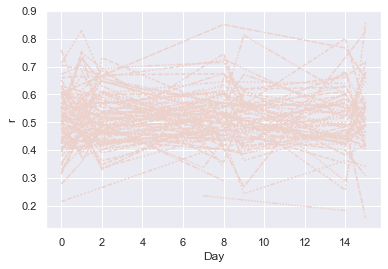

In [ ]:
sktof=skto[skto["n"]>40]
# sktof=sktof[sktof["uID"]%20==0]
sktof=sktof[sktof["LineNumber"]==208]
a=sns.lineplot(data=sktof, y="r", x="Day", 
hue="LineNumber", 
# estimator=None,
style='uID'
)
# plt.legend(visible=False)
a.get_legend().remove()
a

In [ ]:
# sktof=skto[skto["n"]>20]


In [ ]:
# sktof=skto[skto["n"]>40]
# sktof=sktof[sktof["uID"]%20==0]
# sktof=skto[skto["LineNumber"]==208]

In [ ]:
# sktof

In [ ]:
# np.unique(skto["LineNumber"])

In [ ]:
# np.unique(skt["LineNumber"])

In [ ]:
np.unique(skt_unmelted["LineNumber"])

array([ 45,  85, 105, 208, 426, 535, 703, 796, 819, 907])

In [ ]:
skto

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
...,...,...,...,...,...,...,...,...,...,...
10728,5,2,96,819,0,1192,0.0,39.0,0.552632,21.0
10729,5,2,96,819,0,1192,1.0,133.0,0.560606,74.0
10731,5,2,96,819,0,1192,7.0,438.0,0.519451,227.0
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0


In [ ]:
skt

,uID,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,0,1,1,1,45,1,54,0.509434,610.0,0.316913,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,1,2,45,1,873,0.321101,217.0,0.601852,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,2,1,1,3,45,1,196,0.635897,686.0,0.400000,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,3,1,1,4,45,1,3,0.500000,257.0,0.378906,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,4,1,1,5,45,1,0,NaN,726.0,0.388966,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1188,5,2,92,819,0,343,0.654971,158.0,0.477707,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1189,1189,5,2,93,819,0,281,0.435714,31.0,0.566667,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,1190,5,2,94,819,0,126,0.328000,395.0,0.428934,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1191,1191,5,2,95,819,0,472,0.585987,363.0,0.651934,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.unique(skt_unmelted_obs['LineNumber'])

array([ 45,  85, 105, 208, 426, 535, 703, 796, 819, 907])

In [ ]:
skt[skt["LineNumber"]==208]

,uID,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
240,240,2,2,1,208,0,128,0.551181,119.0,0.728814,...,33.0,0.375000,186.0,0.508108,900.0,0.421580,806.0,0.490683,242.0,0.402490
241,241,2,2,2,208,0,787,0.487277,50.0,0.755102,...,69.0,0.602941,884.0,0.485844,740.0,0.581867,663.0,0.543807,19.0,0.500000
242,242,2,2,3,208,0,3,0.000000,9.0,0.500000,...,249.0,0.633065,26.0,0.360000,382.0,0.288714,171.0,0.558824,257.0,0.277344
243,243,2,2,4,208,0,0,NaN,47.0,0.586957,...,0.0,NaN,-1.0,NaN,-1.0,NaN,-1.0,NaN,-1.0,NaN
244,244,2,2,5,208,0,12,0.909091,49.0,0.583333,...,689.0,0.568314,202.0,0.671642,535.0,0.550562,706.0,0.547518,74.0,0.547945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,852,4,2,44,208,0,73,0.500000,1.0,NaN,...,82.0,0.481481,4.0,1.000000,50.0,0.571429,47.0,0.413043,NaN,NaN
853,853,4,2,45,208,0,66,0.630769,4.0,0.333333,...,382.0,0.469816,3.0,1.000000,7.0,0.666667,12.0,0.454545,NaN,NaN
854,854,4,2,46,208,0,93,0.413043,307.0,0.408497,...,730.0,0.559671,45.0,0.409091,450.0,0.683742,543.0,0.413284,NaN,NaN
855,855,4,2,47,208,0,615,0.570033,122.0,0.537190,...,808.0,0.520446,27.0,0.423077,785.0,0.492347,720.0,0.502086,NaN,NaN


In [52]:
skt_unmelted

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
...,...,...,...,...,...,...,...,...,...,...
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0
10733,5,2,96,819,0,1192,9.0,231.0,0.500000,115.0
10734,5,2,96,819,0,1192,14.0,NaN,NaN,NaN
10735,5,2,96,819,0,1192,15.0,NaN,NaN,NaN


<AxesSubplot:xlabel='Day', ylabel='r'>

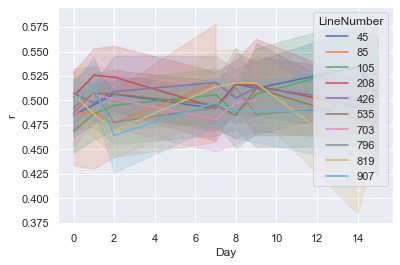

In [ ]:
sns.lineplot(data=skt_unmelted.astype({"LineNumber": "category"}), x="Day", y="r", hue="LineNumber")

<AxesSubplot:xlabel='LineNumber', ylabel='r'>

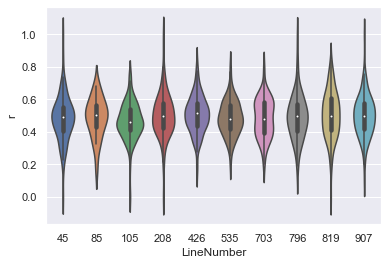

In [ ]:
sns.violinplot(data=skt_unmelted[skt_unmelted['Day']==0].astype({"LineNumber": "category"}), x="LineNumber", y="r")

In [ ]:
a=pd.concat([skt_unmelted.groupby("uID").aggregate(np.mean), skt_unmelted.groupby("uID").agg(rstd=pd.NamedAgg(column="r", aggfunc="std"))], axis=1)
a

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Day,n,r,x,rstd
uID,,,,,,,,,,
0,1.0,1.0,1.0,45.0,1.0,8.0,392.875,0.454396,194.857143,0.098285
1,1.0,1.0,2.0,45.0,1.0,8.0,248.625,0.543134,129.666667,0.252722
2,1.0,1.0,3.0,45.0,1.0,8.0,111.500,0.511966,135.000000,0.118403
3,1.0,1.0,4.0,45.0,1.0,8.0,53.500,0.481060,46.500000,0.069484
4,1.0,1.0,5.0,45.0,1.0,8.0,90.250,0.388966,282.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
1188,5.0,2.0,92.0,819.0,0.0,8.0,345.400,0.589080,210.200000,0.075825
1189,5.0,2.0,93.0,819.0,0.0,8.0,240.600,0.443399,120.000000,0.085563
1190,5.0,2.0,94.0,819.0,0.0,8.0,422.400,0.475632,221.800000,0.122507


/Users/ryanmaloney/miniforge3/envs/cmdstan/lib/python3.10/site-packages/seaborn/categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


<AxesSubplot:xlabel='LineNumber', ylabel='rstd'>

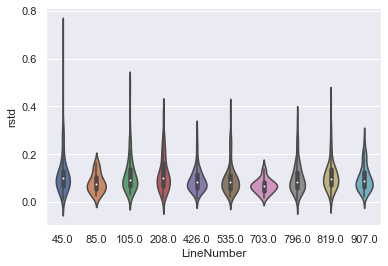

In [ ]:
sns.violinplot(data=a.astype({"LineNumber": "category"}), x="LineNumber", y="rstd")

In [ ]:
# pd.join(skt_unmelted, skt_unmelted.groupby("uID").agg(rstd=pd.NamedAgg(column="r", aggfunc="std")), )

In [ ]:
b=pd.concat([a, skt_unmelted.groupby("uID").agg(rmean=pd.NamedAgg(column="r", aggfunc="mean"))], axis=1)
b

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,Day,n,r,x,rstd,rmean
uID,,,,,,,,,,,
0,1.0,1.0,1.0,45.0,1.0,8.0,392.875,0.454396,194.857143,0.098285,0.454396
1,1.0,1.0,2.0,45.0,1.0,8.0,248.625,0.543134,129.666667,0.252722,0.543134
2,1.0,1.0,3.0,45.0,1.0,8.0,111.500,0.511966,135.000000,0.118403,0.511966
3,1.0,1.0,4.0,45.0,1.0,8.0,53.500,0.481060,46.500000,0.069484,0.481060
4,1.0,1.0,5.0,45.0,1.0,8.0,90.250,0.388966,282.000000,NaN,0.388966
...,...,...,...,...,...,...,...,...,...,...,...
1188,5.0,2.0,92.0,819.0,0.0,8.0,345.400,0.589080,210.200000,0.075825,0.589080
1189,5.0,2.0,93.0,819.0,0.0,8.0,240.600,0.443399,120.000000,0.085563,0.443399
1190,5.0,2.0,94.0,819.0,0.0,8.0,422.400,0.475632,221.800000,0.122507,0.475632


<AxesSubplot:xlabel='LineNumber', ylabel='rmean'>

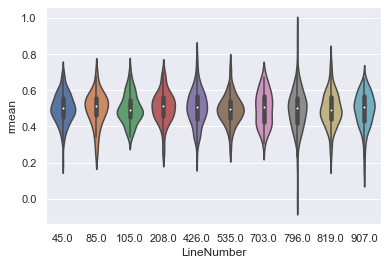

In [ ]:
sns.violinplot(data=b, x="LineNumber", y="rmean")

In [ ]:
sk796=skt_unmelted[skt_unmelted["LineNumber"]==796]
sk796=sk796.loc[:,["uID", "Day", "r"]].reset_index(drop=True)
sk796=sk796.astype({"uID": "category"})

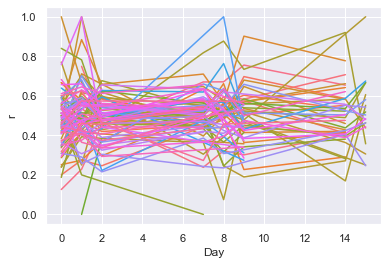

In [ ]:
a=sns.lineplot(data=sk796.loc[:,["uID", "Day", "r"]], x="Day", y='r', hue="uID")
a.get_legend().remove()

In [ ]:
sk535=skt_unmelted[skt_unmelted["LineNumber"]==535]
sk535=sk535.loc[:,["uID", "Day", "r"]].reset_index(drop=True)
sk535=sk535.astype({"uID": "category"})

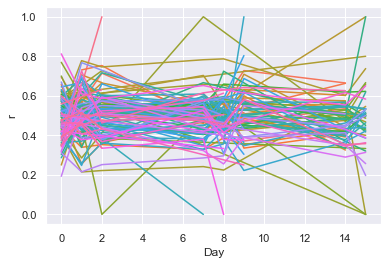

In [ ]:
a=sns.lineplot(data=sk535.loc[:,["uID", "Day", "r"]], x="Day", y='r', hue="uID")
a.get_legend().remove()

In [ ]:
skt_all=skt_unmelted.loc[:,["uID", "LineNumber", "Day", "r"]]
skt_all=skt_all.astype({"uID": "category"}).astype({"LineNumber": "category"})

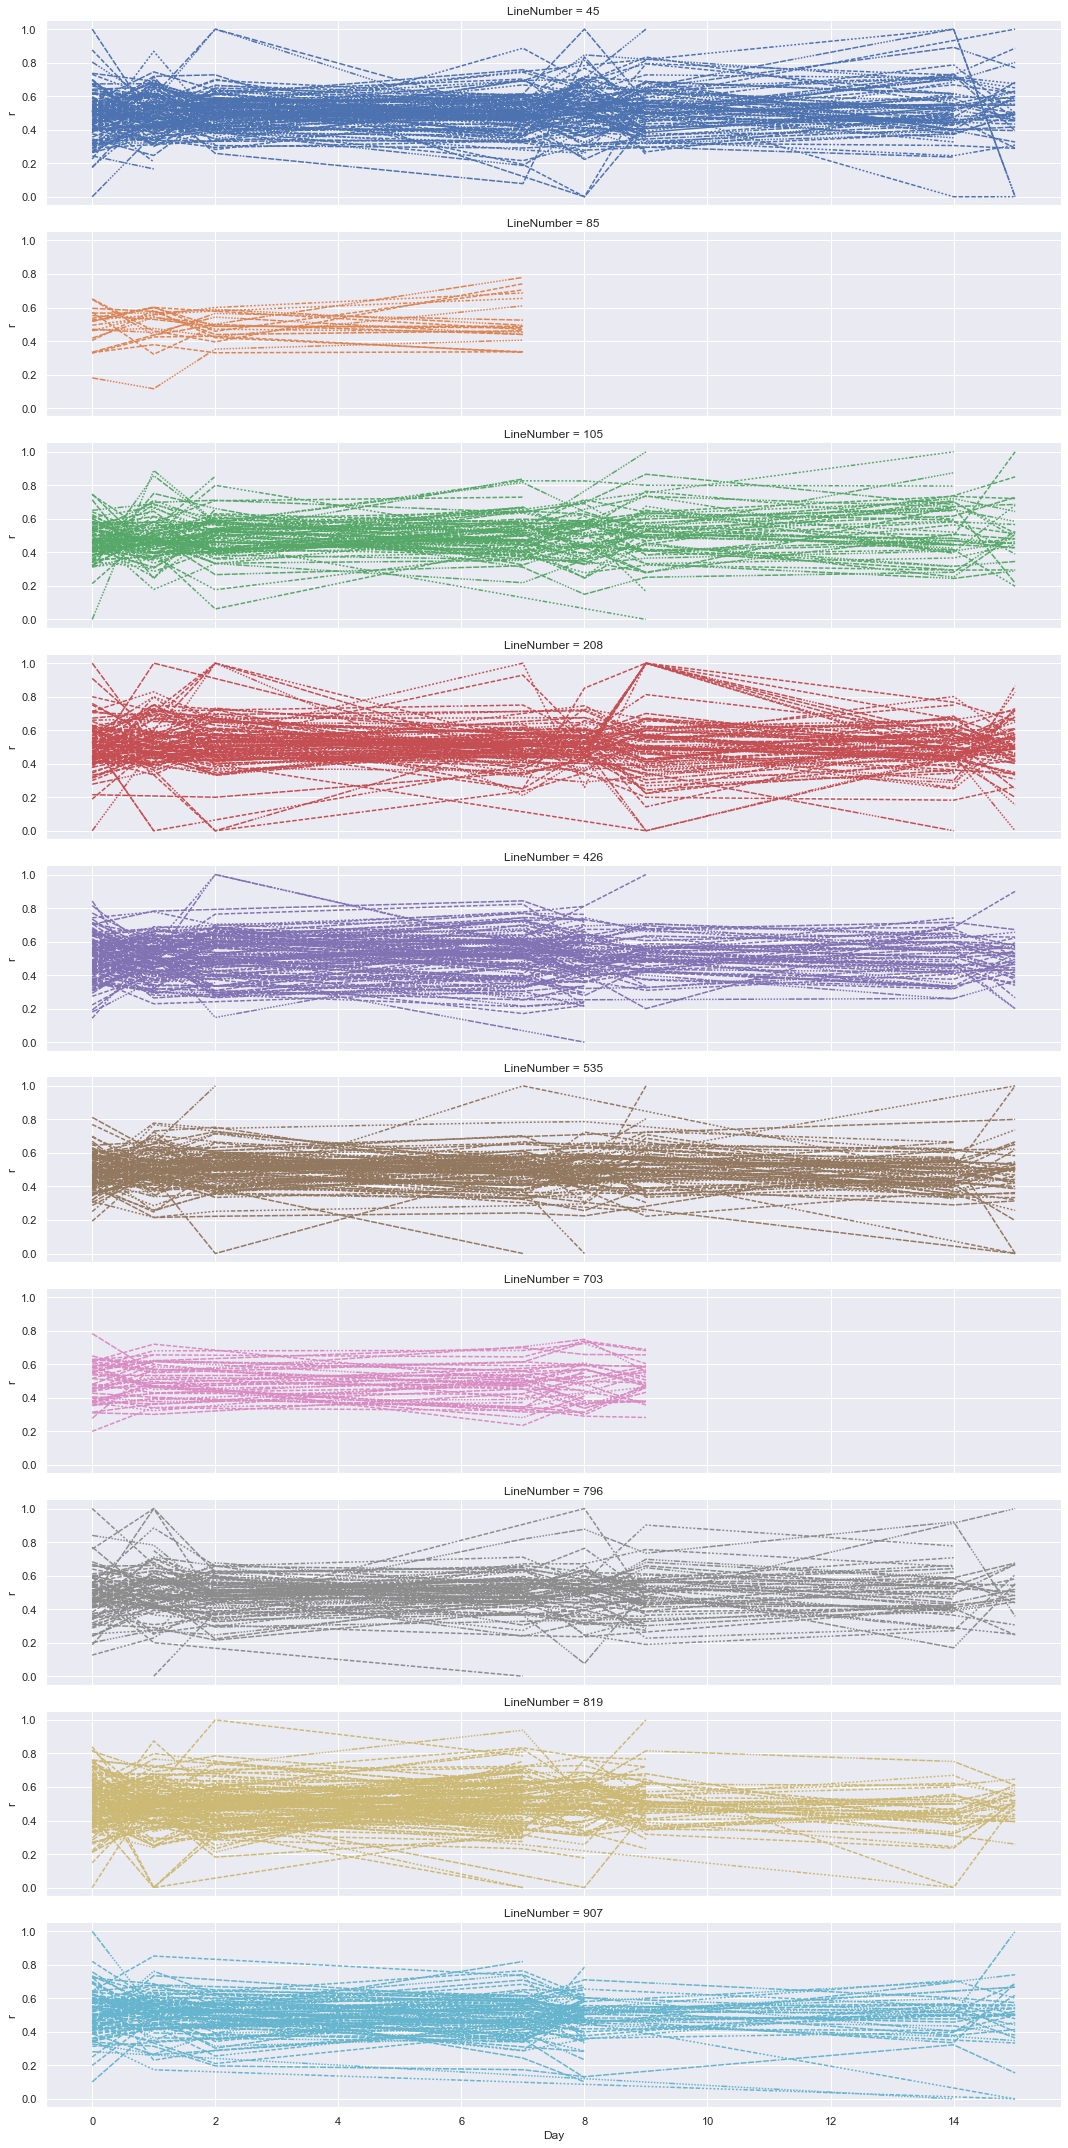

In [ ]:
g=sns.FacetGrid(skt_all,  row="LineNumber", aspect=5)
g.map_dataframe(sns.lineplot, x="Day", y="r", style="uID", hue="LineNumber")
plt.savefig('individualfliesbyline.pdf')

In [ ]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-157545.000000,1.128580,30.917800,-157596.000000,-157546.000000,-157495.000000,750.498,33.8764,1.006490
R1_obs[1],0.500450,0.000599,0.047094,0.421475,0.500810,0.577406,6174.970,278.7290,0.999803
R1_obs[2],0.466279,0.000359,0.032844,0.412785,0.466470,0.519919,8350.260,376.9190,0.999723
R1_obs[3],0.426793,0.000231,0.019815,0.394548,0.426794,0.459711,7351.390,331.8310,0.999216
R1_obs[4],0.516386,0.000346,0.028550,0.468709,0.516140,0.563213,6821.430,307.9100,0.999338
...,...,...,...,...,...,...,...,...,...
R2[464],0.498313,0.005146,0.269485,0.076877,0.495333,0.924572,2742.830,123.8070,0.999464
R2[465],0.494212,0.005940,0.267180,0.077408,0.486694,0.917073,2023.050,91.3178,1.001310
R2[466],0.598919,0.000516,0.039691,0.534092,0.598884,0.664880,5923.310,267.3700,0.999848
R2[467],0.563754,0.000858,0.056702,0.469057,0.565305,0.655713,4370.210,197.2650,0.999887


In [ ]:
fd

NameError: name 'fd' is not defined

In [ ]:
b=sns.histplot(fd["R[1,2]"])
# b.set_xlim([0,1])
b

In [ ]:
a=sns.histplot(fd["R[1,14]"])
a.set_xlim([0,1])

In [ ]:
# def extractparameterarrays(fd):
fdm=fd.reset_index().melt(id_vars="index")
fdm
fd1=fdm[fdm.variable.str.contains("\[") & fdm.variable.str.contains("\[1,")]






In [ ]:
import re
r=re.compile(r"R\[([0-9]+)\,([0-9]+)")
x=r.search('R[1,14]')
x[2]
# fdm[60579995]
indexes=fdm['variable'].str.extract(r"R\[([0-9]+)\,([0-9]+)")

In [ ]:
indexes

In [ ]:
fdm["i1"]=indexes[0]
fdm["i2"]=indexes[1]
fdm

In [ ]:
fdm_subset=fdm.variable.str.contains('R\[')

In [ ]:
fdm

In [ ]:
AllRs=fdm[fdm_subset]
AllRs.iloc[:,2:]



In [ ]:
AllRs=AllRs.iloc[:,2:]
AllRs=AllRs.astype({"i1": "int", "i2":"int"})
AllRs=AllRs.rename(columns={"i1":"uID", "i2":"Day"})
AllRs["uID"]=AllRs["uID"]-1
AllRs["Day"]=AllRs["Day"]-1

In [ ]:
AllRs=AllRs.merge(skt[["uID","LineNumber"]])
AllRs

In [ ]:
sktut=skt_unmelted.astype({"Day": "int", "uID":"int", "n":"float"})
sktut[["uID", "Day", "r", "n"]]
AllRs2=AllRs.merge(sktut[["uID", "Day", "r", "n"]], how="left")
AllRs2

In [ ]:
AllRs=AllRs.astype({"LineNumber": "category"})

In [ ]:
# AllRs_trunc[AllRs_trunc["uID"]==120]

In [ ]:
AllRs_trunc=AllRs2[AllRs2["uID"]%10==0]
AllRs_trunc

In [ ]:
g=sns.FacetGrid(AllRs_trunc,  row="uID", aspect=5, hue="LineNumber")
g.map_dataframe(sns.violinplot, x="Day", y="value")
g.map_dataframe(sns.lineplot, x="Day", y="r")
g.map_dataframe(sns.scatterplot, x="Day", y="r",
  size='n',
  marker="X",
  # color='w',
  zorder=100,
  # edgecolors='w'
  )

g.add_legend()
plt.savefig('individualdayestimates.jpg')
plt.savefig('individualdayestimates.pdf')
# sns.violinplot(data=AllRs_p)

NameError: name 'AllRs_trunc' is not defined

In [ ]:
# fdm.pivot(index="index", columns=["variable", "i1", "i2"])

In [ ]:
fd1p=fd1.pivot(index="index", columns="variable")

In [ ]:
fd1p

In [ ]:
sns.violinplot(data=fd1p)

In [ ]:
fd.reset_index()

In [ ]:
fdm.variable

In [ ]:
extractparameterarrays(fd)

In [ ]:
from matplotlib.pyplot import xlim


a=sns.histplot(fd["R[1,14]"][2000:])
a.set_xlim([0,1])

In [ ]:
fsn.loc["R[1,14]"]

In [53]:
skt_unmelted[skt_unmelted["uID"]==0]

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
5,1,1,1,45,1,0,9.0,387.0,0.383420,148.0
6,1,1,1,45,1,0,14.0,741.0,0.535135,396.0
7,1,1,1,45,1,0,15.0,NaN,NaN,NaN
8,1,1,1,45,1,0,16.0,-1.0,NaN,NaN


In [54]:
# os.remove('dgrp_model5')

stan_file2="dgrp_model5.stan"
# stan_file="dgrp_model_test.stan"
model2 = CmdStanModel(stan_file=stan_file2)


In [55]:
fit2new = model2.sample(data=dgrp_data_sk_2d,
 show_console=True,
  iter_sampling=1000)

13:42:46 - cmdstanpy - INFO - Chain [1] start processing
13:42:46 - cmdstanpy - INFO - Chain [2] start processing
13:42:46 - cmdstanpy - INFO - Chain [3] start processing
13:42:46 - cmdstanpy - INFO - Chain [4] start processing
13:42:46 - cmdstanpy - INFO - Chain [1] done processing
13:42:46 - cmdstanpy - INFO - Chain [2] done processing
13:42:46 - cmdstanpy - INFO - Chain [3] done processing
13:42:46 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
13:42:46 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
13:42:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:42:46 - cmdstanpy - INFO - Chain [4] done processing
13:42:46 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.050000000000000003 (Default)
Chain [1] delta = 0.80000000000000004 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/lmtru0ow.json
Chain [1] init = 2 (Default)
Chain [1] random


RuntimeError: Error during sampling:
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpsyixxzr3/tmphxwaq7bc.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpsyixxzr3/tmphxwaq7bc.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpsyixxzr3/tmphxwaq7bc.stan', line 3, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpsyixxzr3/tmphxwaq7bc.stan', line 3, column 2 to column 17)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model5', 'id=1', 'random', 'seed=95431', 'data', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/lmtru0ow.json', 'output', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model5nurufdnw/dgrp_model5-20230403134246_1.csv', 'method=sample', 'num_samples=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model5nurufdnw/dgrp_model5-20230403134246_1.csv
 console_msgs (if any):
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model5nurufdnw/dgrp_model5-20230403134246_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [ ]:
fit2new.diagnose()

In [ ]:
fd=fit2new.draws_pd()
sns.histplot(fd["D[7]"])

In [ ]:
dpm=Drift_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian")
plt.savefig('Drift_SK_DGRP.pdf')


In [ ]:
BH_parameters=fd.loc[:,"BH[1]":"BH[7]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)


In [ ]:

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":"SD of initial preference"})
sns.violinplot(data=bhpm, x="DGRP Line", y="SD of initial preference")
plt.savefig('BH_SK_DGRP.pdf')


In [ ]:

dpm
bhpm["SD of initial preference"]
bhd=pd.concat([dpm, bhpm["SD of initial preference"]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.2
bhd_r["Size"]=sz
bhd_r["Size"]
sp=sns.scatterplot(data=bhd_r, x="SD of initial preference", y="SD of Drift Gaussian", hue="DGRP Line",
# sizes=sz,
alpha=.5)
sp
plt.savefig('sp_SK_DGRP.pdf')

In [56]:
fd

NameError: name 'fd' is not defined

In [ ]:
# def extractparameterarrays(fd):
fdm=fd.reset_index().melt(id_vars="index")
fdm
fd1=fdm[fdm.variable.str.contains("\[") & fdm.variable.str.contains("\[1,")]





import re
r=re.compile(r"R\[([0-9]+)\,([0-9]+)")
x=r.search('R[1,14]')
x[2]
# fdm[60579995]
indexes=fdm['variable'].str.extract(r"R\[([0-9]+)\,([0-9]+)")
indexes
fdm["i1"]=indexes[0]
fdm["i2"]=indexes[1]
fdm
fdm_subset=fdm.variable.str.contains('R\[')
fdm
AllRs=fdm[fdm_subset]
AllRs.iloc[:,2:]


AllRs=AllRs.iloc[:,2:]
AllRs=AllRs.astype({"i1": "int", "i2":"int"})
AllRs=AllRs.rename(columns={"i1":"uID", "i2":"Day"})
AllRs["uID"]=AllRs["uID"]-1
AllRs["Day"]=AllRs["Day"]-1
AllRs=AllRs.merge(skt[["uID","LineNumber"]])
AllRs
sktut=skt_unmelted.astype({"Day": "int", "uID":"int", "n":"float"})
sktut[["uID", "Day", "r", "n"]]
AllRs2=AllRs.merge(sktut[["uID", "Day", "r", "n"]], how="left")
AllRs2
AllRs=AllRs.astype({"LineNumber": "category"})
# AllRs_trunc[AllRs_trunc["uID"]==120]
AllRs_trunc=AllRs2[AllRs2["uID"]%10==0]
AllRs_trunc
g=sns.FacetGrid(AllRs_trunc,  row="uID", aspect=5, hue="LineNumber")
g.map_dataframe(sns.violinplot, x="Day", y="value")
g.map_dataframe(sns.lineplot, x="Day", y="r")
g.map_dataframe(sns.scatterplot, x="Day", y="r",
  size='n',
  marker="X",
  # color='w',
  zorder=100,
  # edgecolors='w'
  )

g.add_legend()
plt.savefig('individualdayestimates_2.jpg')
plt.savefig('individualdayestimates_2.pdf')
# sns.violinplot(data=AllRs_p)

In [ ]:
dgrp_data_sk_2d['s']

In [ ]:
pd

In [ ]:
fd["D[8]"]

In [51]:
import cmdstanpy
# cmdstanpy.install_cmdstan(overwrite=True)
cmdstanpy.rebuild_cmdstan()

 (00:00) |            | Building CmdStan                     

In [ ]:
pwd

'/Users/ryanmaloney/Documents/GitHub/DGRP experiments'

In [ ]:
if os.path.exists('dgrp_model7'):
  os.remove('dgrp_model7')

stan_file2="dgrp_model7.stan"
# stan_file="dgrp_model_test.stan"
model2 = CmdStanModel(stan_file=stan_file2)

11:41:17 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7
11:41:26 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7


In [ ]:
fit = model2.sample(data=dgrp_data_sk_alld,
#  show_console=True,
  iter_sampling=1000)

11:46:16 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:46:16 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
11:46:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
11:46:16 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted
11:46:16 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted


11:46:16 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:
Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
	Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
	Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
	Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
	Exception: array[uni,...] assign: accessing element out of range. index 17 out of range; expecting index to be between 1 and 16 (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfu6jsj1j/tmplcd0fvot.stan', line 63, column 4 to column 45)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model7', 'id=1', 'random', 'seed=3398', 'data', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptcs4cmer/btmx3akt.json', 'output', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptcs4cmer/dgrp_model7eqgbd1eh/dgrp_model7-20221031114616_1.csv', 'method=sample', 'num_samples=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptcs4cmer/dgrp_model7eqgbd1eh/dgrp_model7-20221031114616_1.csv
 console_msgs (if any):
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmptcs4cmer/dgrp_model7eqgbd1eh/dgrp_model7-20221031114616_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

In [ ]:
x=fit.summary()

In [ ]:
x

In [ ]:
x[x.index=="R[1,2]"]

In [ ]:
print(x.index)

In [ ]:
print(fit.diagnose())

In [ ]:
fig.clear()
fig, axd=plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(8, 4), constrained_layout=True)


In [ ]:
means=sns.scatterplot(data=x.loc["R_mean[1]":"R_mean[432]"]['Mean'])
means=means.get_figure()
plt.show(means)

In [ ]:
fd=fit.draws_pd()

In [ ]:
fd

In [ ]:
BH_parameters=fd.loc[:,"BH[1]":"BH[7]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)

In [ ]:
D_parameters=fd.loc[:,"D[1]":"D[7]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(D_parameters)


In [ ]:
# dpm=D_parameters.melt()
# dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
# sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian", ax=axs[0,1])
# # plt.savefig('Drift_SK_DGRP.pdf')


In [ ]:
dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian", ax=axd["lower left"])
# plt.savefig('Drift_SK_DGRP.pdf')

In [ ]:
Drift_parameters=fd.loc[:,"D[1]":"D[7]"]
Drift_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(Drift_parameters)


In [ ]:
dpm=Drift_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":"SD of Drift Gaussian"})
sns.violinplot(data=dpm, x="DGRP Line", y="SD of Drift Gaussian")
# sns.histplot(data=dpm, x="SD of Drift Gaussian")


In [ ]:
# plt.savefig('Drift_SK_DGRP.pdf')
BH_parameters=fd.loc[:,"BH[1]":"BH[7]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
sns.histplot(BH_parameters)


In [ ]:
bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":"SD of initial preference"})
sns.violinplot(data=bhpm, x="DGRP Line", y="SD of initial preference", ax=axd["upper left"])
# plt.savefig('BH_SK_DGRP.pdf')


In [ ]:
import stan_helpers as sh
import imp
imp.reload(sh)
fig,fd=sh.plotResults(fit, skt, BHdes="BH Gaussian", Ddes="Drift Gaussian")
# fig

In [ ]:
fd

In [ ]:
dpm
bhpm["SD of initial preference"]
bhd=pd.concat([dpm, bhpm["SD of initial preference"]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.2
bhd_r["Size"]=sz
bhd_r["Size"]
sp=sns.scatterplot(data=bhd_r, x="SD of initial preference", y="SD of Drift Gaussian", hue="DGRP Line",
# sizes=sz,=[]
ax=axd["right"],
alpha=.5)
sp
# plt.savefig('sp_SK_DGRP.pdf')

In [ ]:
fig

In [ ]:
xax=sp.get_xaxis()
xax.axis_name="Hello"

In [ ]:
sf=sp.get_figure()

In [ ]:
xax=sf.get_axes()[0]

In [ ]:
xax.xaxis.label.set_text('SD of Fly Means')
xax.yaxis.label.set_text('SD of Fly Daily rBias (within fly)')

In [ ]:
sf

In [60]:
dgrp_data_sk_2d

{'N': 1193,
 'S': array([ 45,  85, 105, 208, 426, 535, 703, 796, 819, 907]),
 's': array([1, 1, 1, ..., 9, 9, 9], dtype=int8),
 't1_obs': 1149,
 't2_obs': 913,
 't1_mis': 44,
 't2_mis': 280,
 't1i_obs': array([   1,    2,    3, ..., 1191, 1192, 1193]),
 't2i_obs': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   39,   40,   41,   42,   43,   45,   46,   47,
          48,   49,   50,   51,   52,   53,   54,   55,   56,   57,   58,
          59,   61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
          71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,
          82,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,  100,  101,  104,  105,  106,  107,
         109,  111,  112,  113,  115,  117,  119,  120,  121,  122,  1

In [57]:
if os.path.exists('dgrp_model6'):
  os.remove('dgrp_model6')

stan_file2="dgrp_model6.stan"
# stan_file="dgrp_model_test.stan"
model2 = CmdStanModel(stan_file=stan_file2)

13:43:28 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6
13:43:39 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6


In [58]:
fit = model2.sample(data=dgrp_data_sk_2d,
 show_console=True,
  iter_sampling=1000)

13:43:39 - cmdstanpy - INFO - Chain [1] start processing
13:43:39 - cmdstanpy - INFO - Chain [2] start processing
13:43:39 - cmdstanpy - INFO - Chain [3] start processing
13:43:39 - cmdstanpy - INFO - Chain [4] start processing
13:43:39 - cmdstanpy - INFO - Chain [1] done processing
13:43:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
13:43:39 - cmdstanpy - INFO - Chain [3] done processing
13:43:39 - cmdstanpy - ERROR - Chain [3] error: error during processing Operation not permitted
13:43:39 - cmdstanpy - INFO - Chain [4] done processing
13:43:39 - cmdstanpy - INFO - Chain [2] done processing
13:43:39 - cmdstanpy - ERROR - Chain [2] error: error during processing Operation not permitted
13:43:39 - cmdstanpy - ERROR - Chain [4] error: error during processing Operation not permitted


Chain [1] method = sample (Default)
Chain [1]   sample
Chain [1]     num_samples = 1000 (Default)
Chain [1]     num_warmup = 1000 (Default)
Chain [1]     save_warmup = 0 (Default)
Chain [1]     thin = 1 (Default)
Chain [1]     adapt
Chain [1]       engaged = 1 (Default)
Chain [1]       gamma = 0.050000000000000003 (Default)
Chain [1]       delta = 0.80000000000000004 (Default)
Chain [1]       kappa = 0.75 (Default)
Chain [1]       t0 = 10 (Default)
Chain [1]       init_buffer = 75 (Default)
Chain [1]       term_buffer = 50 (Default)
Chain [1]       window = 25 (Default)
Chain [1]     algorithm = hmc (Default)
Chain [1]       hmc
Chain [1]         engine = nuts (Default)
Chain [1]           nuts
Chain [1]             max_depth = 10 (Default)
Chain [1]         metric = diag_e (Default)
Chain [1]         metric_file =  (Default)
Chain [1]         stepsize = 1 (Default)
Chain [1]         stepsize_jitter = 0 (Default)
Chain [1]     num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [

RuntimeError: Error during sampling:
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp0qshm7iu/tmpaxaxi7wi.stan', line 5, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp0qshm7iu/tmpaxaxi7wi.stan', line 5, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp0qshm7iu/tmpaxaxi7wi.stan', line 5, column 2 to column 17)
Exception: variable does not exist; processing stage=data initialization; variable name=T; base type=int (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmp0qshm7iu/tmpaxaxi7wi.stan', line 5, column 2 to column 17)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/Users/ryanmaloney/Documents/GitHub/DGRP experiments/dgrp_model6', 'id=1', 'random', 'seed=55877', 'data', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/i4ujamkh.json', 'output', 'file=/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model6hicj8bdy/dgrp_model6-20230403134339_1.csv', 'method=sample', 'num_samples=1000', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model6hicj8bdy/dgrp_model6-20230403134339_1.csv
 console_msgs (if any):
	/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model6hicj8bdy/dgrp_model6-20230403134339_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_85218/1347649658.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


Checking Diagnose
Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmpfsk0id63/dgrp_model3ds1cgj_f/dgrp_model3-20230403133532_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



KeyError: 'BH[1]'

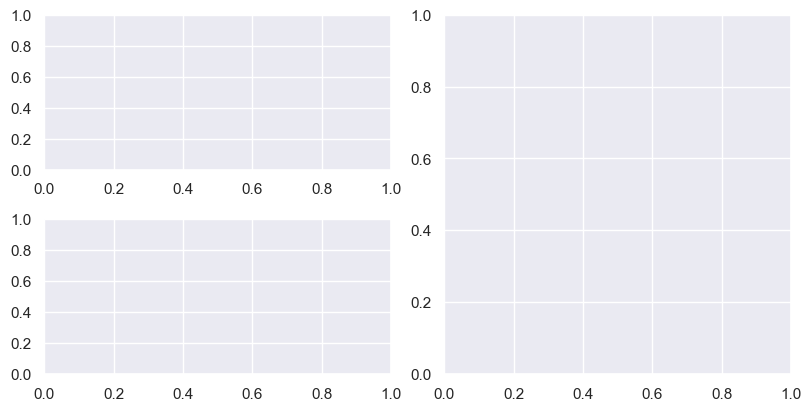

In [59]:
import stan_helpers as sh
import imp
imp.reload(sh)
fig,fd=sh.plotResults(fit, skt, BHdes="BH Gaussian", Ddes="Drift Gaussian")
# fig

In [ ]:
# plt.show(fig)
# fig.savefig('model6_BHatBeginningLogit.pdf')

In [ ]:
plt.show(fig)

In [ ]:
fig

In [ ]:
fig.sa